In [1]:
from autometrics.dataset.datasets import Primock57
from autometrics.util.analysis import display_top_5_metrics_by_validation_precomputed, display_top_5_metrics_by_validation, get_top_metric_by_validation, get_top_metric_by_validation_precomputed, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression.PLS import PLS
from autometrics.aggregator.regression import Ridge, ElasticNet, Lasso, RandomForest, GradientBoosting, Linear
from autometrics.aggregator.regression.BudgetRegression import BudgetRegression

In [2]:
dataset = Primock57(path='./autometrics/dataset/datasets/primock57/metric-scores.csv')

In [3]:
calculate_correlation(dataset)

{'time_sec': {'human_note | ROUGE-1-F1*': np.float64(-0.2210666653540734),
  'human_note | ROUGE-2-F1*': np.float64(-0.2438561070499559),
  'human_note | ROUGE-3-F1*': np.float64(-0.2304967336644645),
  'human_note | ROUGE-4-F1*': np.float64(-0.2147377902945769),
  'human_note | ROUGE-L-Pr*': np.float64(-0.21559914070728997),
  'human_note | ROUGE-L-Re*': np.float64(-0.2667973914168294),
  'human_note | ROUGE-L-F1*': np.float64(-0.24372441111590204),
  'human_note | CHRF*': np.float64(-0.22112983608173942),
  'human_note | METEOR*': np.float64(-0.27302879924172485),
  'human_note | BLEU*': np.float64(-0.23480766931196095),
  'human_note | Levenshtein dist.': np.float64(-0.3399838906893468),
  'human_note | WER': np.float64(-0.14613320973746502),
  'human_note | MER': np.float64(-0.2517157405070455),
  'human_note | WIL': np.float64(-0.2548656737983419),
  'human_note | ROUGE-WE*': np.float64(-0.2613073502029944),
  'human_note | SkipThoughts*': np.float64(-0.1960303692056642),
  'human

In [4]:
splits, train_overall, test = dataset.get_kfold_splits()

In [5]:
display_top_5_metrics_by_validation(train_overall, test)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,edited_note | Levenshtein dist. (-0.7836385364...,edited_note | BertScore* (-0.679324768795567),edited_note | METEOR* (-0.6415565515712728),edited_note | ROUGE-2-F1* (-0.6220635172447756),edited_note | WIL (-0.618607349090542)
incorrect,edited_note | ROUGE-L-Pr* (-0.7599518162562565),max | ROUGE-L-Pr* (-0.7289057983401043),avg | ROUGE-L-Pr* (-0.5921270369903772),avg | WIL (-0.5386001061638434),avg | ROUGE-4-F1* (-0.5572615669397235)
omissions,edited_note | Levenshtein dist. (-0.8129598284...,edited_note | METEOR* (-0.7911759287121515),edited_note | BLEU* (-0.7766301429916344),edited_note | BertScore* (-0.7756347892553319),edited_note | ROUGE-L-Re* (-0.7665601945470363)
inc_plus_omi,edited_note | Levenshtein dist. (-0.8161162974...,edited_note | BertScore* (-0.7887644013170787),edited_note | ROUGE-2-F1* (-0.7390873601955601),edited_note | ROUGE-3-F1* (-0.74232056164724),edited_note | WIL (-0.7256978273473398)


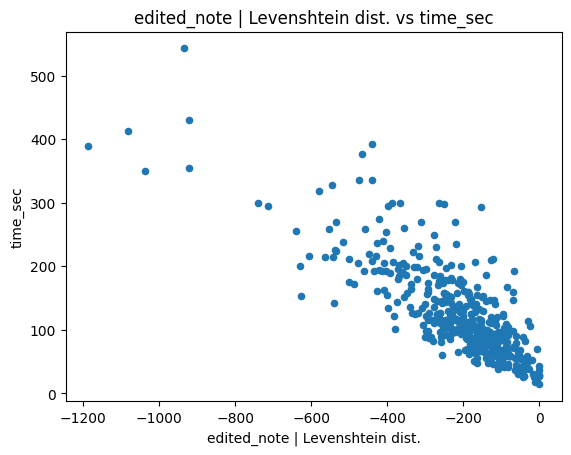

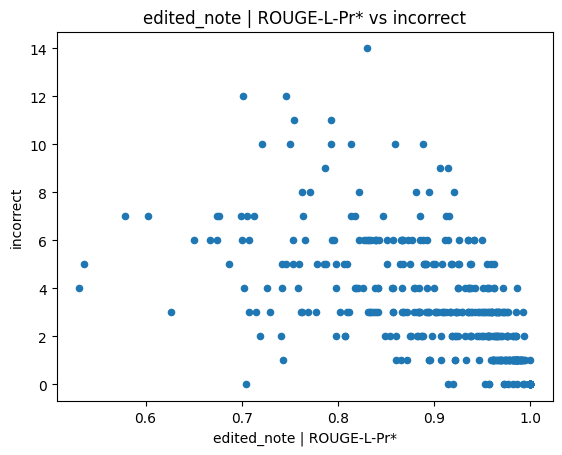

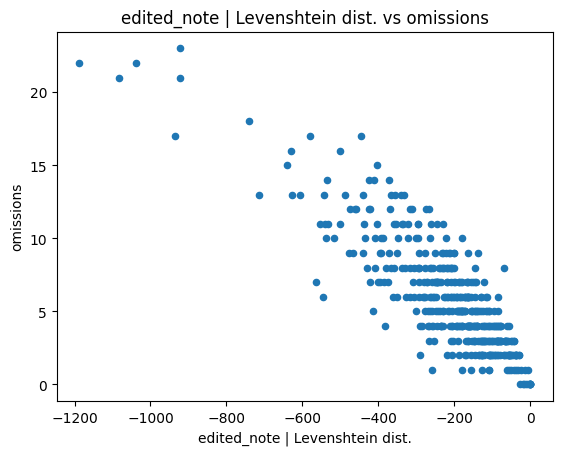

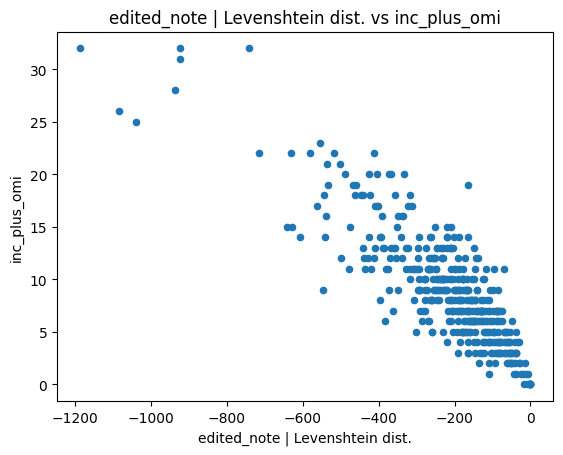

In [6]:
for target_column in dataset.get_target_columns():
    metric = get_top_metric_by_validation(train_overall, target_column, compute_all=False)
    plot_metric_target_scatterplot(test, metric, target_column)

In [7]:
sum_correlations = {}

for split in splits:
    train, val = split
    for target in dataset.get_target_columns():
        aggregator = Ridge(dataset=train, name=f'Ridge_{target}')
        aggregator.learn(train, target)
        aggregator.predict(val, target)

    corr = calculate_correlation(val, compute_all=True)

    for target in dataset.get_target_columns():
        if target not in sum_correlations:
            sum_correlations[target] = {}
        for metric in corr[target]:
            if metric not in sum_correlations[target]:
                sum_correlations[target][metric] = 0
            sum_correlations[target][metric] += corr[target][metric]

for target in sum_correlations:
    for metric in sum_correlations[target]:
        sum_correlations[target][metric] /= len(splits)

In [8]:
test_corr = {}

for target in dataset.get_target_columns():
    aggregator = Ridge(dataset=train_overall, name=f'Ridge_{target}')
    aggregator.learn(train_overall, target)
    aggregator.predict(test, target)

    test_corr = calculate_correlation(test, compute_all=True)

In [9]:
display_top_5_metrics_by_validation_precomputed(sum_correlations, sum_correlations)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8338685672092631),Rg_inc_plus_omi (0.7936921421424248),Rg_omissions (0.7900724948154819),edited_note | Levenshtein dist. (-0.7764478225...,edited_note | BertScore* (-0.6912279896538068)
incorrect,Rg_incorrect (0.8201886135526006),edited_note | ROUGE-L-Pr* (-0.7851829479745349),max | ROUGE-L-Pr* (-0.7496318416117786),Rg_inc_plus_omi (0.6875110961406246),avg | ROUGE-L-Pr* (-0.6247162443020835)
omissions,Rg_omissions (0.8795231298936381),edited_note | Levenshtein dist. (-0.8292818610...,edited_note | METEOR* (-0.827449668817336),Rg_time_sec (0.8154060019181225),edited_note | BLEU* (-0.8049008681828621)
inc_plus_omi,Rg_inc_plus_omi (0.8937852164921158),Rg_omissions (0.8451079876689928),Rg_time_sec (0.8423171733649089),edited_note | Levenshtein dist. (-0.8372463468...,edited_note | BertScore* (-0.8125389853450109)


In [10]:
display_top_5_metrics_by_validation_precomputed(sum_correlations, test_corr)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8465888154690532),Rg_inc_plus_omi (0.7685032619149011),Rg_omissions (0.7644221569376707),edited_note | Levenshtein dist. (-0.7836385364...,edited_note | BertScore* (-0.679324768795567)
incorrect,Rg_incorrect (0.8226644379487644),edited_note | ROUGE-L-Pr* (-0.7599518162562565),max | ROUGE-L-Pr* (-0.7289057983401043),Rg_inc_plus_omi (0.6693730112310422),avg | ROUGE-L-Pr* (-0.5921270369903772)
omissions,Rg_omissions (0.8692550285082878),edited_note | Levenshtein dist. (-0.8129598284...,edited_note | METEOR* (-0.7911759287121515),Rg_time_sec (0.8049170691360508),edited_note | BLEU* (-0.7766301429916344)
inc_plus_omi,Rg_inc_plus_omi (0.8903566068163455),Rg_omissions (0.8509025740032761),Rg_time_sec (0.8562045232752173),edited_note | Levenshtein dist. (-0.8161162974...,edited_note | BertScore* (-0.7887644013170787)


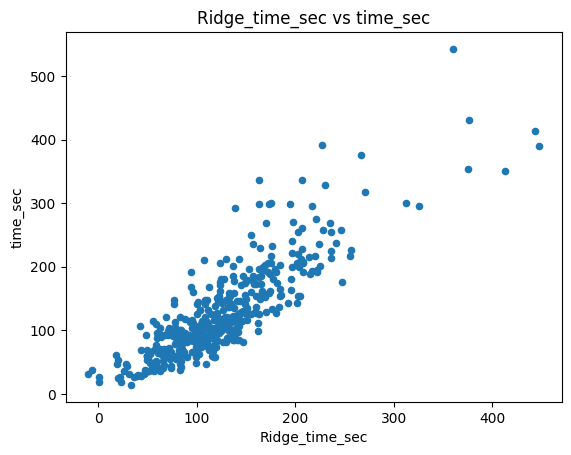

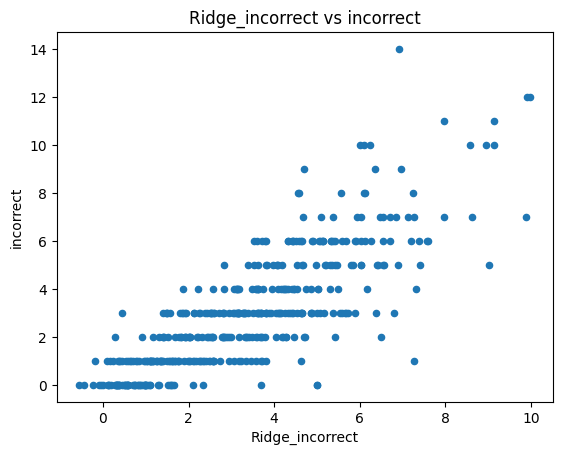

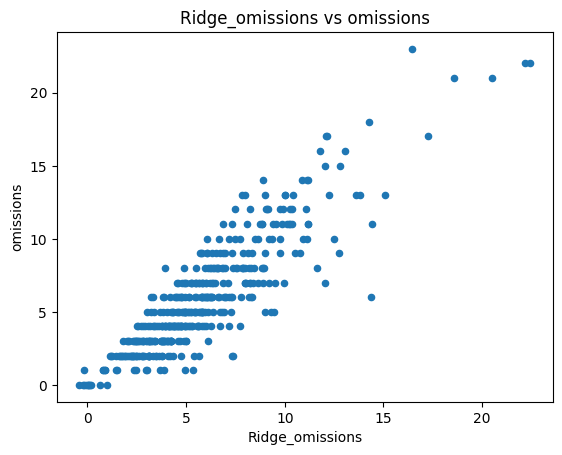

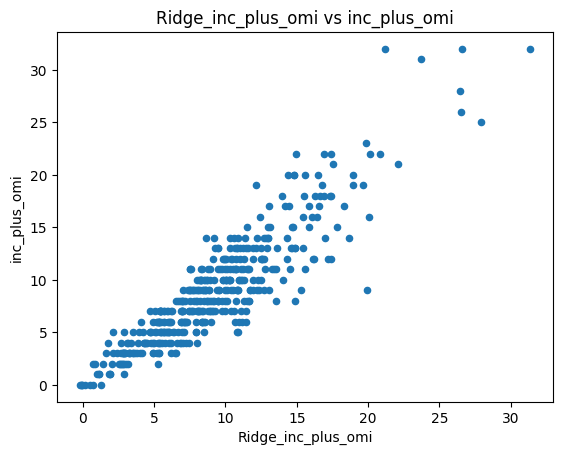

In [11]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation_precomputed(sum_correlations, target_column)
    plot_metric_target_scatterplot(test, metric, target_column)


In [12]:
sum_correlations = {}

for split in splits:
    train, val = split
    for budget in [2, 3, 5, 10, 15, 20, 25]:
        for target in dataset.get_target_columns():
            aggregator = Ridge(dataset=train, name=f'Ridge_{target}')
            budget_model = BudgetRegression(aggregator, budget)
            budget_model.learn(train, target)
            budget_model.predict(val, target)

    corr = calculate_correlation(val, compute_all=True)

    for target in dataset.get_target_columns():
        if target not in sum_correlations:
            sum_correlations[target] = {}
        for metric in corr[target]:
            if metric not in sum_correlations[target]:
                sum_correlations[target][metric] = 0
            sum_correlations[target][metric] += corr[target][metric]

for target in sum_correlations:
    for metric in sum_correlations[target]:
        sum_correlations[target][metric] /= len(splits)

In [13]:
# Budget Runs
for model in [Ridge]:
    for budget in [2, 3, 5, 10, 15, 20, 25]:
        for target_column in dataset.target_columns:
            model_instance = model(dataset=train_overall, name=model.__name__ + '_' + target_column)
            budget_model = BudgetRegression(model_instance, budget)
            budget_model.learn(train_overall, target_column)
            budget_model.predict(train_overall, target_column)
            budget_model.predict(test, target_column)

In [14]:
display_top_5_metrics_by_validation(train_overall, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,edited_note | Levenshtein dist. (-0.7836385364...,Rg_time_secTop 25 (0.7003835208155375),Rg_time_secTop 20 (0.6780208038770255),Rg_time_secTop 15 (0.6716370280586402),Rg_time_secTop 10 (0.6709671743889629)
incorrect,Rg_incorrectTop 25 (0.7966533473220749),Rg_incorrectTop 20 (0.7970296598324406),Rg_incorrectTop 15 (0.7808826045672502),Rg_incorrectTop 10 (0.7632746575473554),edited_note | ROUGE-L-Pr* (-0.7599518162562565)
omissions,Rg_omissionsTop 25 (0.7975475128745616),Rg_omissionsTop 20 (0.7883863499029996),edited_note | Levenshtein dist. (-0.8129598284...,Rg_omissionsTop 15 (0.7762641229215522),Rg_omissionsTop 10 (0.7932015582969795)
inc_plus_omi,Rg_inc_plus_omiTop 25 (0.7933453578958689),Rg_inc_plus_omiTop 20 (0.7804558324771418),edited_note | Levenshtein dist. (-0.8161162974...,Rg_inc_plus_omiTop 15 (0.7986539662349691),Rg_inc_plus_omiTop 10 (0.7724858879017076)


In [15]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(train_overall, test, True, target_column)
    plot_metric_target_scatterplot(test, metric, target_column)

TypeError: get_top_metric_by_validation() takes from 1 to 3 positional arguments but 4 were given